In [10]:
pip install opencv-python mediapipe numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.4 MB 794 kB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Library/Developer/CommandLineTools/usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/fs/sd_gznt92_1387bmvbkzdlb40000gn/T/pip-install-2e7hmym5/dlib_8026c5544f9c4d7facfb2c9a3f61ed1d/setup.py'"'"'; __file__='"'"'/private/var/folders/fs/sd_gznt92_1387bmvbkzdlb40000gn/T/pip-install-2e7hmym5/dlib_8026c5544f9c4d7facfb2c9a3f61ed1d/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/fs/sd_gznt92_1387bmvbkzdlb40000gn/T/pip-wheel-jf4ggpl0
       cwd: /private/var/folders/fs/sd_gznt92_13

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import os

# Initialize Mediapipe for face and pose detection
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.6)
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

all_facial_landmarks = []
all_body_landmarks = []

# Function to detect and display landmarks
def detect_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    body_landmarks = []
    facial_landmarks = []

    # Detect pose landmarks
    pose_results = pose.process(image_rgb)
    if pose_results.pose_landmarks:
        print(f"Pose landmarks found in {image_path}")
        for landmark in pose_results.pose_landmarks.landmark:
            body_landmarks.append([landmark.x, landmark.y])
            

    # Detect facial landmarks
    face_results = face_mesh.process(image_rgb)
    if face_results.multi_face_landmarks:
        print(f"Facial landmarks found in {image_path}")
        for face_landmarks in face_results.multi_face_landmarks:
            for idx, landmark in enumerate(face_landmarks.landmark):
                facial_landmarks.append([landmark.x, landmark.y])

    if facial_landmarks:
        all_facial_landmarks.append(facial_landmarks)
    if body_landmarks:
        all_body_landmarks.append(body_landmarks)

    # Return processed image
    return facial_landmarks,  body_landmarks

# Directory containing your images
image_dir = 'Images/'  # Replace with the correct path

# Loop through all provided images
for image_file in os.listdir(image_dir):
    if image_file.endswith(('.jpg')):
        image_path = os.path.join(image_dir, image_file)
        detect_landmarks(image_path)


I0000 00:00:1725772143.290694  385984 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1725772143.297274  385984 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Max
W0000 00:00:1725772143.298646  387193 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725772143.301301  387197 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725772143.366612  387179 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725772143.378169  387185 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for fe

Facial landmarks found in Images/DSC02458 2.jpg
Pose landmarks found in Images/IMG_5344 2.jpg
Pose landmarks found in Images/IMG_5302 2.jpg
Pose landmarks found in Images/IMG_5391_2.jpg
Pose landmarks found in Images/IMG_5418 2.jpg
Pose landmarks found in Images/IMG_8913_2.jpg
Facial landmarks found in Images/IMG_8913_2.jpg
Pose landmarks found in Images/DSC04728_Original 2.jpg
Facial landmarks found in Images/DSC04728_Original 2.jpg


In [3]:
average_facial = np.mean(all_facial_landmarks, axis=0)

average_body = np.mean(all_body_landmarks, axis=0)

print(average_body, average_facial)

[[0.49525367 0.18361618]
 [0.53385938 0.16276142]
 [0.55835555 0.16261105]
 [0.57989336 0.16258824]
 [0.45586597 0.16244515]
 [0.42956304 0.16224639]
 [0.40677751 0.16226384]
 [0.61134834 0.16967109]
 [0.37983681 0.1702936 ]
 [0.53912353 0.20478964]
 [0.45096914 0.20549552]
 [0.78369001 0.28173756]
 [0.21222108 0.28430724]
 [0.92075969 0.38703186]
 [0.12629588 0.43012292]
 [0.96456796 0.44867469]
 [0.15504736 0.5529705 ]
 [0.9882371  0.47131704]
 [0.13640112 0.59422037]
 [0.9396782  0.4653179 ]
 [0.17961287 0.59247329]
 [0.90757922 0.45979875]
 [0.19796784 0.57815454]
 [0.66429706 0.56337738]
 [0.3279959  0.5631546 ]
 [0.68414491 0.76327424]
 [0.31585593 0.76188109]
 [0.61342245 0.91087608]
 [0.29741147 0.90100662]
 [0.56357259 0.92754178]
 [0.3137294  0.91538932]
 [0.69153712 0.98616015]
 [0.28947524 0.97829303]] [[0.4573029  0.27145086]
 [0.45631976 0.25818196]
 [0.45701265 0.26265049]
 [0.44673311 0.2439454 ]
 [0.45638535 0.25374567]
 [0.45687823 0.24811226]
 [0.45872266 0.23471339]

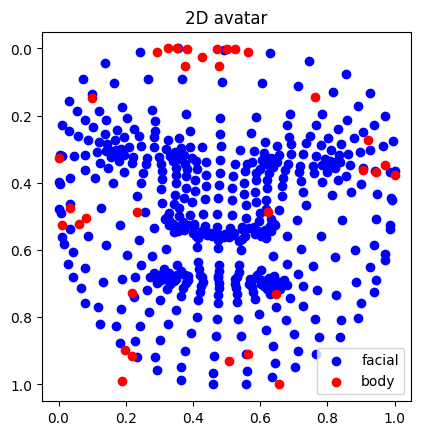

In [4]:
import matplotlib.pyplot as plt

def normalize_landmarks(landmarks):
    # Convert landmarks to a NumPy array if not already
    landmarks = np.array(landmarks)
    
    # Normalize the landmarks between 0 and 1
    min_vals = np.min(landmarks, axis=0)
    max_vals = np.max(landmarks, axis=0)
    return (landmarks - min_vals) / (max_vals - min_vals)

def plot_landmarks(facial_landmarks, body_landmarks):
    fig, ax = plt.subplots()


    facial_landmarks = normalize_landmarks(facial_landmarks)
    body_landmarks = normalize_landmarks(body_landmarks)

    if len(facial_landmarks) > 0:
        facial_landmarks = np.array(facial_landmarks)
        ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', label= 'facial')

    if len(body_landmarks) > 0:
        body_landmarks = np.array(body_landmarks)
        ax.scatter(body_landmarks[:, 0], body_landmarks[:, 1], c='red', label= 'body')
    
    ax.set_aspect('equal')
    ax.invert_yaxis()
    plt.legend()
    plt.title('2D avatar')
    plt.show()

plot_landmarks(average_facial, average_body)

In [9]:
from PIL import Image
import cv2
import numpy as np

def overlay_landmarks_on_image(image_path, facial_landmarks, body_landmarks):
    try:
        # Use PIL to load the image
        pil_image = Image.open(image_path)
        image = np.array(pil_image)  # Convert the PIL image to a NumPy array (for OpenCV)

        # Convert landmarks to pixel coordinates (assuming the image size is [h, w])
        height, width, _ = image.shape

        def rescale_landmarks(landmarks, width, height):
            return np.array([[int(x * width), int(y * height)] for x, y in landmarks])

        # Rescale the facial and body landmarks
        facial_landmarks_rescaled = rescale_landmarks(facial_landmarks, width, height)
        body_landmarks_rescaled = rescale_landmarks(body_landmarks, width, height)

        # Overlay facial landmarks on the image
        for x, y in facial_landmarks_rescaled:
            cv2.circle(image, (x, y), 2, (255, 0, 0), -1)  # Blue dots for facial landmarks

        # Overlay body landmarks on the image
        for x, y in body_landmarks_rescaled:
            cv2.circle(image, (x, y), 2, (0, 0, 255), -1)  # Red dots for body landmarks

        # Display the image with landmarks
        output_image_path = 'image_with_landmarks.jpg'  # Change to your preferred path
        cv2.imwrite(output_image_path, image)

    except Exception as e:
        print(f"Error loading or processing image: {e}")

# Call the function with the correct image path
image_path = 'Images/IMG_5302 2.jpg'  # Replace with your actual path
overlay_landmarks_on_image(image_path, average_facial, average_body)


In [14]:
pip install build dlib numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached dlib-19.24.6.tar.gz (3.4 MB)
anceled
ERROR: Operation cancelled by user
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2
import dlib
import numpy as np

# Load images
img_face = cv2.imread('Images/IMG_5418 2.jpg')  # Your face image
img_target = cv2.imread('Images/M+NSW+CLUB+TEE.png')  # Target image

# Load Dlib face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Download from Dlib

def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        points = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            points.append((x, y))
        return np.array(points, dtype=np.int32)

def face_swap(img1, img2):
    # Get landmarks for both faces
    points1 = get_landmarks(img1)
    points2 = get_landmarks(img2)

    # Convex hull for face 1 and 2
    hull1 = cv2.convexHull(points1)
    hull2 = cv2.convexHull(points2)

    # Create mask and apply transformation
    mask = np.zeros_like(img2, dtype=np.uint8)
    cv2.fillConvexPoly(mask, hull2, (255, 255, 255))

    # Warp the face from img1 to img2
    face_warp = cv2.getAffineTransform(points1[:3].astype(np.float32), points2[:3].astype(np.float32))
    warped_face = cv2.warpAffine(img1, face_warp, (img2.shape[1], img2.shape[0]))

    # Combine warped face and target
    img2_face_masked = cv2.bitwise_and(img2, cv2.bitwise_not(mask))
    result = cv2.add(img2_face_masked, warped_face)

    return result

# Perform the face swap
result_image = face_swap(img_face, img_target)

# Save and show the result
cv2.imwrite('result_face_swap.png', result_image)
cv2.imshow('Face Swapped', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'dlib'